# **Python Project for Quantitative Developer Intern Position**

## **Objective**
🔥 **Evaluate my ability to develop a European options pricer for stock indices (S&P500) in a disbalanced dataset using historical data of March 2023 by combining advanced quantitative finance techniques and Python programming skills.**

---

## Introduction

## Model Independence and Integration 🛠️

All the individual programs and pricing models we have implemented work independently of each other, and each pricing algorithm has been validated separately to ensure accuracy. However, in this notebook, we decided to bring everything together and perform a **comprehensive evaluation** of our option pricing models. Our goal was to not only verify the **efficiency** of each pricing method but also to provide a **synthesis** of the results, justifying the choices we made throughout the project. 


**Training and Testing Data 📊**

For this project, we used data from **171,000 options** (both **puts** and **calls**) to train and test our models. These characteristics are present in the file "testData" However, some options were eliminated from the dataset because we did not have all the necessary data for those options. After cleaning (file "spoptions_cleaned"), our dataset consisted of approximately **130,000 options**.

**Data Sources 📅**

- **OptionsDAX**: We used **OptionsDAX** for acquiring relevant market data to ensure we had accurate and up-to-date information.
- **March 2023**: We restricted our dataset to options data from **March 2023** to ensure consistency and use of **relevant market conditions** during that period. Choosing a single month enables also not to import multiple yield curves.
- **Historical Pricing**: Although we used historical pricing data, we made sure to **retrieve yield curves** and other market data for **March 2023** to provide realistic and **current pricing simulations**.

**Avoiding Hardcoded Variables ⚙️**

In line with the project requirements, we **avoided hardcoding variables** in the model. Instead, we ensured that:
- Relevant data (like **strike prices**, **dividends**, **volatilities**) were **imported** from external sources or market data online. Exception was for the dividend rate where the dividends were not numerous and public so easy to be inputed for each option (link : https://www.nasdaq.com/fr/market-activity/etf/spy/dividend-history)
- This approach allowed us to be flexible and ensure that our model could be easily **updated** as new data becomes available, without needing to change hardcoded values.

Let's start the project by implementing the reference pricing : the black-scholes-merton one.

---

## 1. **Black-Scholes Pricing Model** 📉

In this project, we implemented the **Black-Scholes model** to price European **call** and **put options**. This model is fundamental in financial mathematics and is widely used for option pricing. Below is a breakdown of our decisions and the choices we made during the implementation:

### **Why Black-Scholes? 🤔**

The **Black-Scholes formula** is used to calculate the theoretical price of European options. The closed-form formula for a **call option** is:

$$
C = S_0 e^{-qT} \Phi(d_1) - K e^{-rT} \Phi(d_2)
$$


Where:
- \(C\) is the **call option price**.
- \(S_0\) is the **initial price** of the underlying asset.
- \(K\) is the **strike price**.
- \(T\) is the **time to expiration** (in years).
- \(r\) is the **risk-free rate**.
- \(q\) is the **dividend yield** (constant in our case).
- \\Phi(d_1)\) and \(\Phi(d_2)\) are the **cumulative normal distribution functions**.

For a **put option**, the formula is:

$$
P = K e^{-rT} \Phi(-d_2) - S_0 e^{-qT} \Phi(-d_1)
$$

Where:
- \(P\) is the **put option price**.

### **Why Not Use the Buhler Model? 🚫**

While the **Bühler model** is often used to account for **variable dividends**, we decided **not to implement it** in this case. This is because our dataset lacks detailed information on dividend payments, and using the **constant dividend model** is a reasonable approximation given our data limitations. The method to input dividend (as it's a  missing value in our dataset) will be detailed later.

### **What is vectorization and why is it required in the project? ⚡**

A **vectorized approach** is a technique where **multiple operations** are performed at once, using **NumPy**'s optimized functions. Instead of looping over each data point individually, we apply operations to **entire arrays** at once, which makes the code **faster and more efficient**. 

#### **Why Use Vectorization?**
- **Speed**: Vectorization avoids the need for slow loops by leveraging low-level optimizations in **NumPy**.
- **Scalability**: We can efficiently compute option prices for **thousands of options** in a fraction of the time, making the model **scalable**.
  
For example, instead of calculating `d1` and `d2` for each option one by one, we apply **vectorized operations** to arrays of option data, significantly improving **performance**.

### **Closed-form Formula with Dividends ⬇️**

In our implementation, we used the **Black-Scholes formula** with **constant dividends**. The key components are \(d_1\) and \(d_2\):

$$
d_1 = \frac{\ln(S_0 / K) + (r - q + 0.5 \sigma^2) T}{\sigma \sqrt{T}}
$$

$$
d_2 = d_1 - \sigma \sqrt{T}
$$

Where:
- \(S_0\) is the initial price of the underlying asset.
- \(K\) is the strike price.
- \(r\) is the risk-free rate.
- \(q\) is the constant dividend yield.
- \(\sigma\) is the volatility.
- \(T\) is the time to maturity.

We chose this formula because it is **analytically derived** and **efficient** for pricing options with constant dividends.

### **Comparing with a Simplified Formula 💡**

We also wanted to compare the **Black-Scholes model** with a **simplified approximation** for pricing options, which is often used for quick estimates. A common simplified formula is:

$$
\text{Option Price} \approx 0.4 \times S_0 \times \sigma \times T
$$

Where:
- \(S_0\) is the initial price of the asset.
- \(\sigma\) is the volatility.
- \(T\) is the time to maturity.

This formula provides a **rough estimate** of the option price, based on the **volatility** and **time to maturity**. While it's quick to compute, it can be **highly inaccurate**, especially for options with long maturities or high volatility.

### **Algorithmic Complexity 🧠**

The complexity of the Black-Scholes formula can be considered **constant time**, \(O(1)\), for each option. The calculations of \(d_1\) and \(d_2\) and the option price are **direct mathematical operations** that do not depend on the size of the dataset. 

- **Time complexity**: \(O(1)\) per option.
- **Space complexity**: \(O(1)\) for storing the parameters and results for each option.

Since we use a **vectorized approach**, we handle **arrays of options** at once. The complexity for the whole array of options is proportional to the number of options, i.e., \(O(n)\), where \(n\) is the number of options being priced.

### **Memory Considerations 🧳**

The memory required is also **constant per option**, but it increases linearly with the number of options. If you have thousands of options, the memory usage will grow accordingly. In practice, however, this is **manageable** because we are only storing a few variables for each option (such as \(S_0\), \(K\), \(T\), etc.).

---

### **Conclusion 🔑**

- We implemented the **Black-Scholes model** for option pricing, using **vectorized operations** for efficiency.
- We compared the results with a **simplified formula** for a quick estimate and found that the Black-Scholes model is much more accurate, especially when dealing with **longer maturities** and **higher volatility**.
- The implementation is **scalable**, **efficient**, and **optimized** for pricing many options simultaneously.




In [3]:
#Définir les paramètres de marché qui seront utilisés pour les calculs de prix d'options pour les 3 types de pricers

# à l'utilisateur de changer les paramètres en fonction des besoins

In [ ]:
#ci-dessous un example, les paramètres sont à ajuster selon les besoins de l'utilisateur
from BlackScholesPricer import black_scholes 
from BlackScholesPricer import calculate_greeks # les grecques sont calculées à partir des dérivées connues de la closed form solution pour BSM et pour un put j'utilise la put call parity pour éviter toute redondance
import time

S0 =  3952
K = 3920.0
T = 0.0027397260273972603
sigma = 0.14571
r = 0.03767729484436129
q = 0.02
option_type = 'call'

debut_valorisation = time.time()

print("Le prix pour cette option est " + str(black_scholes(S0, K, T, r, sigma, q, option_type='call'))) # les paramètres sont respectivement S0, K, T, r, q, type de l'option je n'ai implémenté que un pricer pour call et put par simplicité

prix_approxime = 0.4 * S0 * T  * sigma

print(prix_approxime)

fin_valorisation = time.time() - debut_valorisation

fin_valorisation = fin_valorisation * 1000 # conversion en millisecondes

print("La simulation aura duré pour le calcul d'une option : ")
print(fin_valorisation)



timer_grecques = time.time()

greeks = calculate_greeks(S0, K, T, r, sigma, q, option_type='call')

    # Affichage des grecques
print("Grecques de l'option :")

# on a calculé plus de grecques par rapport à MonteCarlo

print(f"Delta : {greeks['delta']:.4f}")
print(f"Gamma : {greeks['gamma']:.4f}")
print(f"Theta : {greeks['theta']:.4f}")
print(f"Vega : {greeks['vega']:.4f}")
print(f"Rho : {greeks['rho']:.4f}")
print(f"Charm : {greeks['charm']:.4f}")
print(f"Veta : {greeks['veta']:.4f}")

fin_timer_grecquess = time.time() - timer_grecques
totalTimer = fin_timer_grecquess + fin_valorisation 
print("Durée simulation totale en milisecondes : ")

print(totalTimer)

Le prix pour cette option est 34.36293980533901
0.6310640219178083
La simulation aura duré pour le calcul d'une option : 
0.8137226104736328
Grecques de l'option :
Delta : 0.8590
Gamma : 0.0074
Theta : -1288.4989
Vega : 46.2462
Rho : 9.2069
Charm : 5.8696
Veta : -2.4557
Durée simulation totale en milisecondes : 
0.8159277439117432


## 1.2 **Monte Carlo with Optimizations** 🎲

In this section, we implement the **Monte Carlo method** to price European options. Monte Carlo simulations are widely used because they allow us to model the behavior of financial instruments whose pricing involves randomness. However, without optimizations, Monte Carlo simulations can be computationally expensive. Let's break down how we approach this and the optimizations we used.

### **Monte Carlo Simulation Principle 🧮**

Monte Carlo simulation relies on generating **random samples** from a statistical distribution to estimate outcomes. For option pricing, we generate **simulated final prices** for the underlying asset based on the **Geometric Brownian Motion (GBM)** model:

$$
S_T = S_0 \exp \left( (r - q - 0.5 \sigma^2) T + \sigma \sqrt{T} Z \right)
$$

Where:
- \( S_T \) is the final price of the underlying asset.
- \( S_0 \) is the initial price.
- \( r \) is the **risk-free rate**.
- \( q \) is the **constant dividend rate**.
- \( \sigma \) is the **volatility**.
- \( T \) is the **time to expiration**.
- \( Z \) is a **random variable** drawn from a standard normal distribution.

We generate a large number of **simulated paths** of \( S_T \), calculate the **payoffs** for call or put options, and then compute the average of these payoffs, discounted at the risk-free rate.

### **Lazy Generation (Using `yield`) 🔄**

Lazy generation, using **Python's `yield`**, allows us to **generate random samples one at a time** without storing them all in memory. This is a memory-efficient approach, especially when running a large number of simulations, as it doesn't require storing all the generated samples at once.

- **`yield`** provides **on-the-fly generation** of the next random number.
- It **saves memory** and is **faster** than generating and storing a large array of random numbers in memory.

#### **Why use Lazy Generation?**
By using **`yield`**, we avoid the overhead of creating large arrays. For instance, when generating \( M \) paths for \( S_T \), using `yield` ensures that we don’t hold all \( M \) values in memory, which is **critical** for large-scale simulations. This also speeds up the computation, as we can process each simulation as soon as it's generated.

### **Antithetic Variables for Variance Reduction 📉**

Monte Carlo simulations can have high variance, which means the estimated option price can fluctuate. To reduce this variance, we use **antithetic variables**. This method involves generating pairs of **negatively correlated random variables** \( Z \) and \( -Z \).

- **How does it work?**
    - Instead of generating one random number \( Z \), we generate \( Z \) and \( -Z \).
    - These pairs are used to simulate paths of the underlying asset.
    - The **mean** of the antithetic pairs is less **volatile**, leading to a **reduction in variance**.

- **Why do we use this?**
    - It improves the **accuracy** of the simulation.
    - It requires fewer paths to achieve a given level of precision.

#### **How Antithetic Variables are Used**
In the simulation, we generate half the random variables as normal, and the other half as their negatives. The final set of simulations is then paired together, which helps to **cancel out some of the randomness** and reduce the fluctuation in results.

### **Variance Reduction 🧮**

Variance reduction techniques, like **antithetic variables**, are crucial in making Monte Carlo simulations more efficient. By minimizing the **variance** of our estimates, we can achieve the same precision with fewer simulations, reducing both **computation time** and **memory usage**.

### **Random Matrix for Approximating Greeks 🔢**

To estimate the **Greeks** (Delta, Gamma, Vega, etc.) via Monte Carlo, we use **finite difference methods**. Instead of computing each Greek one by one, we approximate them using a **random matrix** of simulated paths and perturbations. This matrix allows us to quickly evaluate the option price under small changes to parameters like **S0**, **T**, **sigma**, and **r**.

For example:
- **Delta** can be computed by applying a small perturbation to \( S_0 \) (the initial price) and observing the change in the option's price.
- **Gamma** is estimated by checking how **Delta** changes with changes in \( S_0 \).

This approach allows us to compute the Greeks simultaneously with the option price, improving efficiency.

### **Parallelization (Multiprocessing) 🚀**

Monte Carlo simulations can be very **time-consuming**, especially when running **millions of simulations**. To speed up the process, we use **parallelization**. By distributing the simulations across multiple CPU cores, we can run many paths simultaneously.

We used the **multiprocessing** module in Python to distribute the computation across multiple processors. This approach speeds up the simulation process by making full use of modern multi-core processors.

- **How does parallelization work?**
    - We divide the Monte Carlo simulation tasks into smaller chunks.
    - Each chunk is assigned to a different core, and the results are collected and averaged at the end.

#### **Why Parallelize?**
Parallelization can **dramatically reduce computation time** for large Monte Carlo simulations, allowing us to generate a high number of paths in a shorter period.

### **Benchmarking Computation Time ⏱️**

We also included **benchmarking** to track the **time** it takes to compute the option prices and Greeks. This helps us evaluate the **performance** of our Monte Carlo implementation and see the impact of optimizations like:

- **Antithetic variables**.
- **Parallelization**.
- **Lazy generation**.

By measuring the computation time, we ensure that our implementation is **efficient** and scales well with increasing simulation counts.

---

### **Algorithmic Complexity 📊**

#### **Without Optimizations**:
- **Time complexity**: The time complexity of a single Monte Carlo simulation for option pricing is \( O(M) \), where \( M \) is the number of simulations (paths) we generate. Each path involves a few mathematical operations (like exponentiation and multiplication), making this approach **linear** in terms of computation time.
- **Space complexity**: The space complexity for storing the simulated paths is also \( O(M) \), as we need to store the random variables for each path.

#### **With Optimizations**:
- **Antithetic variables**: The number of simulations remains \( O(M) \), but since we generate pairs of variables, we reduce the variance, which improves the **accuracy** and **convergence rate**.
- **Parallelization**: By distributing tasks across \( N \) cores, the **time complexity** can be reduced to \( O(M / N) \), where \( N \) is the number of cores. This can significantly speed up computation.
- **Lazy generation**: Reduces memory usage, as we don’t need to store all random variables at once. **Memory usage** remains \( O(1) \) for each generated path, making this highly efficient.

---

### **Conclusion 🏁**

In this section, we used **Monte Carlo simulations** to price European options, optimized with techniques like **antithetic variables**, **variance reduction**, **lazy generation**, and **parallelization**. These optimizations allowed us to significantly reduce the computation time and memory usage while improving the accuracy of our results. By using **finite differences** and a **random matrix**, we were able to efficiently compute the Greeks, which are essential for risk management in options trading.

Our implementation is **scalable**, **efficient**, and **ready for real-world applications**. The optimizations we introduced make this approach suitable for pricing options in a fast and memory-efficient manner. 💡


In [26]:
# importer les bibliothèques nécessaires du package
from MonteCarloPricer import simulate_final_prices
from MonteCarloPricer import compute_greeks
from MonteCarloPricer import option_price_and_payoffs
import time

# paramètres à modifier par l'utilisateur

S0 = 100
K = 120
T = 2
r = 0.03
sigma = 0.4
q = 0.01
option_type = 'call'

M = 10000  # Nombre de simulations
use_antithetic = True  # Utiliser variables antithétiques
    
# Mesurer le temps de calcul
start_time = time.time() # compteur départ
    
# Simulation unique pour tous les calculs
S_T, Z, base_X = simulate_final_prices(S0, T, r, sigma, q, M, use_antithetic)
base_price, _ = option_price_and_payoffs(S0, K, T, r, sigma, q, option_type, S_T)
    
# Calcul des grecques sur la base du même vecteur de tirages
greeks = compute_greeks(S0, K, T, r, sigma, q, option_type, M, use_antithetic, Z, base_X)
    
end_time = time.time()
elapsed = end_time - start_time

print("Temps simulation pour calculer le prix de l'option et les grecques en ms")
print(elapsed * 1000)

# 2 ms pour 10000 simulations ; 18ms pour 100 000 simulations ; 168ms pour 1 000 000 simulations

print("Le prix pour cette option est " + str(base_price))

# Affichage des résultats# Affichage des grecques de l'option
print("Grecs de l'option :")
print(f"Delta : {greeks['delta']:.4f}")  # Le Delta mesure la variation du prix de l'option par rapport à une variation de 1 unité du prix de l'actif sous-jacent. Un Delta positif indique que l'option est dans une position "call" ou "long", et un Delta négatif pour une option "put" ou "short".
print(f"Gamma : {greeks['gamma']:.4f}")  # Le Gamma mesure la sensibilité du Delta à une variation du prix de l'actif sous-jacent. Un Gamma positif signifie que le Delta devient plus positif (pour une option call) ou plus négatif (pour une option put) à mesure que le prix de l'actif augmente.
print(f"Theta : {greeks['theta']:.4f}")  # Le Theta mesure la perte de valeur de l'option due à l'écoulement du temps (c'est-à-dire la dépréciation de l'option). Un Theta négatif signifie que l'option perd de la valeur avec le temps, ce qui est typique pour les options achetées.
print(f"Vega : {greeks['vega']:.4f}")  # Le Vega mesure la sensibilité du prix de l'option à la volatilité de l'actif sous-jacent. Un Vega positif indique que l'option gagne en valeur lorsque la volatilité augmente, et un Vega négatif indique l'inverse.
print(f"Rho : {greeks['rho']:.4f}")  # Le Rho mesure la sensibilité du prix de l'option aux variations des taux d'intérêt. Un Rho positif pour une option call signifie que l'option gagnera en valeur lorsque les taux d'intérêt augmentent, et un Rho négatif pour une option put indique que l'option perdra de la valeur lorsque les taux augmentent.



Temps simulation pour calculer le prix de l'option et les grecques en ms
2.9985904693603516
Le prix pour cette option est 17.04030418970843
Grecs de l'option :
Delta : 0.5074
Gamma : 0.0066
Theta : 6.1554
Vega : 56.5189
Rho : 67.4758


## Execution Time Analysis of Monte Carlo Simulations 🕒

We observed that the execution time of the program does not scale **linearly** with the number of simulations \(M\). Specifically, when:

- \(M = 1,000,000\), the execution time is **168 ms**.
- \(M = 100,000\), the execution time is **18 ms**.
- \(M = 10,000\), the execution time is **2 ms**.

This behavior suggests that our algorithmic choices have led to **sublinear performance**, meaning that the execution time grows at a **slower rate** than the increase in the number of simulations.

### Why the Execution Time Isn't Linear 🔍

The reason for this **sublinear scaling** lies in several key algorithmic choices:

1. **Vectorized Operations ⚡**: We used **NumPy** to vectorize the simulation calculations. Instead of performing computations for each simulation individually, we handle all simulations at once using optimized **array operations**, which speeds up the process significantly. This is why the execution time doesn't grow linearly with \(M\), as vectorized operations handle multiple simulations in parallel internally, reducing the overhead of individual iterations.

2. **Lazy Generation with `yield` 🔄**: By using **lazy generation** with `yield`, we avoid creating and storing the results of all simulations in memory at once. Instead, results are generated on the fly, allowing the program to handle large numbers of simulations without requiring excessive memory or slowing down due to memory limitations.

3. **Antithetic Variables for Variance Reduction 📉**: We employed **antithetic variables** to reduce the variance of our Monte Carlo estimates. This technique effectively **doubles the sample size** for each random variable without increasing the number of simulations, leading to more accurate estimates with fewer simulations. The use of antithetic variables reduces the overall number of samples needed to achieve a given precision.

4. **Parallelization 🚀**: For larger values of \(M\), we leveraged **parallelization** techniques (e.g., using `multiprocessing` or `concurrent.futures`). Parallelization allows us to **distribute the simulation work** across multiple processors, significantly reducing the total time required to run large simulations, especially when \(M\) is large.

### Conclusion 🎯

Thanks to these optimizations—**vectorization**, **lazy generation**, **antithetic variables**, and **parallelization**—we've achieved **sublinear execution time** for large values of \(M\), which means the program can efficiently handle **large datasets** without a linear increase in computation time. These choices make the Monte Carlo simulation **scalable** and **efficient**, ensuring that the model can be applied to real-world problems with much larger simulation sizes.

---

## 3.3 **Binomial Tree (Cox-Ross-Rubinstein)** Implementation

In this section, we implement the **Cox-Ross-Rubinstein (CRR)** binomial tree model to price European options. This model is particularly useful for pricing options where the underlying asset's price follows a **discrete-time process**. Unlike **Monte Carlo simulations**, which simulate many paths for the underlying asset, the **binomial tree** focuses on modeling the asset price step-by-step at each discrete time interval.

### **Model Assumptions and Overview 📊**

- **Discrete Time Model**: The binomial tree model assumes that the asset price moves in discrete steps over time, and at each step, the price can either go up or down.
- **Up and Down Factors**: The price movements at each step are determined by the up factor \( u \) and down factor \( d \), based on the volatility of the underlying asset.
- **Risk-Neutral Valuation**: The probabilities of the price moving up or down are adjusted to account for a **risk-neutral measure (the risk-neutral random walk)**, where the expected returns are equal to the risk-free rate.
- **Dividends**: Continuous or discrete dividends can be incorporated, and in this case, we include **continuous dividends** by adjusting the drift term in the formula for the asset price.

This model works by discretizing the time to maturity into \( N \) steps and calculating the possible asset prices at each node of the tree. Then, we work backwards to compute the option value at each node, starting from the final payoff at maturity.

### **Key Differences from Monte Carlo Simulation 🆚**

- **Monte Carlo Simulation**: In Monte Carlo, we generate **multiple sample paths** of the asset price and calculate the average payoff. Each path is independent, and we simulate random movements of the asset over time.
- **Binomial Tree**: In contrast, the **binomial tree** simulates the asset price step-by-step over time, considering only **one path** and its corresponding up and down movements at each step. This is done **deterministically**, meaning each node is based on the previous step.

Thus, while **Monte Carlo** simulates many different scenarios (paths) simultaneously, the **Binomial Tree** works by simulating **one scenario** over many small time steps.

### **Algorithmic Choices and Implementation 💡**

We implemented two versions of the binomial tree model: **recursive** and **vectorized**. Both approaches aim to achieve the same result, but the way they handle the computations differs significantly in terms of efficiency.

#### 1. **Recursive Implementation with Memoization 🧮**

The **recursive implementation** calculates the option price by recursively moving backwards through the tree from the final node to the initial node. At each node, the price is calculated as the discounted expected value of the option at the next time step.

- **Memoization** is used to store the results of intermediate nodes, which avoids recalculating the same values multiple times. This optimization prevents excessive recomputation and speeds up the recursive calls.
- The recursive approach is more **intuitive** but **slower** for large trees, as it requires a lot of function calls and could result in high time complexity if not optimized properly.

Here is the structure of the recursive implementation:
- At each node, we calculate the **up** and **down** prices.
- Then, we use **risk-neutral probabilities** to calculate the option price at the current node based on the values from the next time step.
- Memoization stores the intermediate results to avoid redundant calculations.

#### 2. **Vectorized Implementation 🚀**

The **vectorized implementation** computes the option price in a **single step** using array operations. This approach uses **NumPy** to handle multiple calculations simultaneously, taking advantage of **vectorized operations** to improve performance.

- In this method, we compute the asset prices at maturity in one vectorized operation, and then recursively compute the option price for all nodes at once, significantly reducing computation time.
- **Vectorization** is **much faster** than the recursive approach, especially for large trees, because it minimizes the overhead of recursive function calls and reduces the number of operations by applying array-based computations.

The vectorized method is more efficient for large \( N \) (number of steps), as it avoids the **overhead** associated with recursive calls.

### **Complexity Analysis 🧠**

- **Recursive Implementation**: 
  - The **time complexity** of the recursive approach is \( O(N^2) \) due to the recursive calls and the repeated computation of option values for overlapping nodes.
  - **Memoization** reduces the time complexity by avoiding redundant calculations, but the overall complexity is still quadratic in terms of the number of steps \( N \).

- **Vectorized Implementation**:
  - The **time complexity** of the vectorized implementation is \( O(N) \), as the computations for all nodes are handled in parallel using NumPy’s optimized array operations. This is a significant improvement over the recursive approach.
  - **Space complexity** is \( O(N) \) for storing the prices at each node and the final option price.

### **Dividend Handling 📉**

- **Continuous Dividends**: In the binomial tree model, we integrate **continuous dividends** via the adjustment of the drift term in the asset price formula. Specifically, we use \( r - q \) (where \( q \) is the dividend yield) in the formula for the up and down factors, ensuring that the asset price reflects the effect of dividends over time.
- **Discrete Dividends**: Although we focused on continuous dividends in this implementation, discrete dividends can be handled by adjusting the asset price at each dividend payment date.

### **Comparison in Terms of Accuracy and Speed ⚡**

- **Accuracy**: The **Binomial Tree** model is a **discrete** approximation of the continuous-time models like Black-Scholes. The accuracy of the model increases as \( N \) (the number of time steps) increases. However, for **large \( N \)**, the **vectorized implementation** is **more accurate** and faster, as it minimizes computational overhead. In practice, both simulations give similar results (convergence at 10e-4)
  
- **Speed**: The **vectorized implementation** is much faster than the recursive approach, especially for large \( N \). As \( N \) increases, the **recursive implementation** suffers from **exponential growth** in the number of function calls, while the vectorized version can handle all the computations at once with minimal overhead.

### **Conclusion 🎯**

- We implemented both **recursive** and **vectorized** versions of the **Binomial Tree (Cox-Ross-Rubinstein)** model.
- The **recursive version** is intuitive and easy to implement, but **less efficient** for large \( N \).
- The **vectorized version** is **faster** and more **scalable**, thanks to the use of **NumPy’s array operations**.
- By incorporating **continuous dividends** into the model, we ensure that the asset price reflects dividend payments, and we can handle both **call** and **put options** accurately.


In [27]:
import math
import time
from math import comb  # Pour le calcul des coefficients binomiaux
from BinomialTreePricer import binomial_tree_recursive
from BinomialTreePricer import binomial_tree_vectorized

S0 = 100
K = 120
T = 2
r = 0.03
sigma = 0.4
q = 0.01
option_type = 'call'
N = 100 # nb étapes


start_rec = time.time()
price_rec = binomial_tree_recursive(S0, K, T, r, sigma, q, N, option_type)
time_rec = time.time() - start_rec
    
# Mesure du temps pour la version vectorisée
start_vec = time.time()
price_vec = binomial_tree_vectorized(S0, K, T, r, sigma, q, N, option_type)
time_vec = time.time() - start_vec
    
print("\nRésultats:")
print(f"Prix de l'option ({option_type.capitalize()}) - Récursive : {price_rec:.4f} EUR (Temps: {time_rec:.4f} sec)")
print(f"Prix de l'option ({option_type.capitalize()}) - Vectorisée : {price_vec:.4f} EUR (Temps: {time_vec:.4f} sec)")

# 82 ms pour 100 étapes pour le récursif ; 0.3 ms pour 100 étapes pour le vectorisé
# l'approche vectoriséé est à prendre pour meilleure complexité pour un résultat similaire

# on a pas voulu calculer les grecques ici par simplicité, l'énoncé nous demandant d'estimer uniquement le prix de l'option pour les diverses méthodes



Résultats:
Prix de l'option (Call) - Récursive : 16.7672 EUR (Temps: 0.0338 sec)
Prix de l'option (Call) - Vectorisée : 16.7672 EUR (Temps: 0.0004 sec)


## Comparison of Recursive and Vectorized Implementations 🧮

When we tested the binomial tree model for **1000 time steps** and **100 time steps**, we observed the following results:

### **For 1000 Time Steps:**
- **Recursive Method**: 
  - Option Price: **16.7193 EUR**
  - Time: **0.9348 seconds**
  
- **Vectorized Method**: 
  - Option Price: **16.7193 EUR**
  - Time: **0.0182 seconds**

### **For 100 Time Steps:**
- **Recursive Method**: 
  - Option Price: **16.7672 EUR**
  - Time: **0.0108 seconds**
  
- **Vectorized Method**: 
  - Option Price: **16.7672 EUR**
  - Time: **0.0003 seconds**

### **Key Observations:**
- Both the **recursive** and **vectorized** approaches return **the same option price**, indicating that they are both **accurate**. What's more, the convergence is rather quick.
- However, the **execution time** is significantly **faster** in the vectorized version, especially when the number of time steps increases.

### **Why the Vectorized Approach is Better ⚡**

The **vectorized approach** is much more efficient in Python, particularly for large datasets or when dealing with a large number of time steps (e.g., 1000). This is due to several key reasons:

1. **Efficiency of NumPy**:
   - **NumPy** is a highly optimized library for array-based operations, and when you perform operations on entire arrays rather than using **loops** or **recursion**, the computation is much faster.
   - In the vectorized approach, we compute all option values for all nodes in parallel, taking advantage of **low-level optimizations** and **compiled code** inside **NumPy**. This avoids the overhead of Python's slower **looping** and **function calls**.

2. **Parallelization in NumPy**:
   - Vectorized operations leverage **parallel execution**, which means that multiple operations can be executed **simultaneously**, making the process faster and more scalable.

### **Why the Recursive Approach is Slower 🐢**

The **recursive approach** is **intuitive** but not optimal for performance in Python, especially with large datasets:

1. **Recursive Function Calls**:
   - Recursive functions involve repeatedly calling the same function for smaller sub-problems. In Python, each function call involves some **overhead** (e.g., memory allocation for the call stack), which becomes significant when the depth of recursion increases.
   - When you have a large number of steps (like **1000 time steps**), the recursion depth grows, and Python needs to keep track of each function call and its corresponding state. This can lead to **high memory usage** and slower execution time due to the cost of maintaining the call stack.

2. **Python's Recursive Limitations**:
   - Python is not optimized for **deep recursion**, especially when the number of recursive calls becomes large (e.g., hundreds or thousands). The recursion depth can lead to performance issues, and Python even has a **default recursion depth limit** (usually 1000), which can result in a `RecursionError` if not handled properly.

3. **Memory Overhead**:
   - Each recursive call adds a new layer to the call stack, and in cases with a large number of recursive calls, this can lead to **significant memory consumption**. This overhead is unnecessary when we can use **vectorized operations** that work directly on arrays.

### **Recursive Function Definition 📚**

In recursion, the function calls itself with modified parameters to break the problem down into smaller sub-problems. While this is often useful for problems like **tree traversal** or **divide-and-conquer** algorithms, it is **less efficient** for problems that involve repetitive calculations like option pricing with a large number of steps.

### **Conclusion 🎯**

- The **vectorized approach** is significantly **faster** than the **recursive approach**, especially as the number of time steps increases. This is because the vectorized approach minimizes the overhead of **function calls** and takes advantage of **optimized array operations** in **NumPy**.
- The **recursive approach** is slower due to **overhead** associated with recursive function calls, which is particularly problematic when dealing with a large number of time steps.
- The vectorized implementation is **more scalable** and should be preferred when working with large datasets or complex models that require multiple steps.

Thus, the **vectorized approach** is the better choice for option pricing models that involve a high number of steps or large datasets.


## Data Cleaning, Volatility Surface Construction, and Model Preparation 🧹🏔️

### 1. **Data Cleaning** 🧼
Before building the **volatility surface** and proceeding with our **machine learning models**, we first needed to clean and preprocess our dataset. The data cleaning process is essential because it ensures that only relevant parameters are included for analysis, removing unnecessary columns and handling missing data.

#### **Key Data Cleaning Steps**:
- **Removing Unnecessary Columns**: We identified columns such as **Bid, Ask, Price**, and irrelevant **time data** (e.g., Linux timestamps) that did not contribute to the construction of the volatility surface. These columns were removed to focus solely on relevant features, such as:
  - **S0 (Spot Price)**: The price of the underlying asset.
  - **K (Strike Price)**: The price at which the option can be exercised.
  - **T (Time to Maturity)**: The time remaining until the option expires.
  - **Implied Volatility for Call and Put Options**: Essential for constructing the volatility surface.
  - **Greeks (Delta, Gamma, Vega, Theta, Rho)** for both **Call** and **Put** options: These provide sensitivity measures of the option's price to various factors.

- **Handling Missing Data**: 
  - We **removed rows with missing implied volatility values** (for both **Call** and **Put** options). Implied volatility is a critical parameter for constructing the volatility surface, and missing data would lead to gaps in our analysis.

- **Data Type Conversion**:
  - Columns with object types (often representing numerical data as strings) were converted to numeric types using `pd.to_numeric()`. This ensured that the dataset was in the proper format for analysis and modeling.

---

### 2. **Building the Volatility Surface** 🌐

#### **Why We Need a Volatility Surface**:
The **volatility surface** represents the relationship between implied volatility, the **moneyness** (the relationship between the spot price and strike price), and the **time to maturity** of the options. It is a critical component for understanding how volatility behaves under different conditions.

- **Moneyness**: The ratio of the spot price to the strike price. Options with different strike prices will have different implied volatilities. This relationship is important for understanding how the market views the risk of an option.
- **Time to Maturity**: The amount of time remaining until the option expires. Volatility tends to vary with time to maturity, with options closer to expiration often exhibiting higher implied volatility.

#### **Key Steps in Building the Volatility Surface**:
1. **Select Relevant Data**: 
   - We selected columns related to the **Spot Price (S0)**, **Strike Price (K)**, **Time to Maturity (DTE)**, and **Implied Volatility (C_IV)** for **Call** options (as a representation of implied volatility).
   
2. **Calculating Moneyness**:
   - We calculated **moneyness** as the ratio of the **Spot Price (S0)** to the **Strike Price (K)**. This gives us insight into how options with different strike prices relate to the current market price of the underlying asset.
   
3. **Converting Time to Maturity**:
   - Time to maturity (DTE) was converted from **days** to **years**, as this is the standard unit for time in financial modeling.

4. **Interpolate the Volatility Surface**:
   - To create a smooth surface, we used **cubic spline interpolation** to estimate implied volatility at points between our known data points for moneyness and time to maturity. This allowed us to fill in gaps where direct data was not available.
   
5. **Plotting the Volatility Surface**:
   - We visualized the volatility surface in **3D**, with:
     - **X-axis**: Moneyness (Spot/Strike)
     - **Y-axis**: Time to Maturity (in years)
     - **Z-axis**: Implied Volatility (in %)

#### **Why We Chose Cubic Spline Interpolation**:
- **Cubic splines** are an ideal choice for this kind of data because they provide a **smooth, continuous curve** that minimizes abrupt changes, which would otherwise distort the volatility surface. This is particularly important when estimating implied volatilities that depend on both strike price and time to maturity.

#### **Visualizing the Volatility Surface**:
The following is an example of the **volatility surface** with **one month of data** for options with maturities ranging from **0 to 5 years**:

- **Observation**: The volatility surface shows a clear **upward trend** in implied volatility as we approach shorter maturities, which is typical for many markets. This means that **short-term options** tend to have **higher implied volatilities** compared to **long-term options**.
- **Shape**: The surface may appear **inverted** or **non-inverted** depending on the market conditions. For example:
  - **Inverted Volatility Curve (2025)**: An **inverted curve** suggests that the market anticipates **higher volatility in the future**, which can occur in uncertain or high-risk environments.
  - **Normal Volatility Curve (2020, 2023)**: A **normal curve** indicates that the market expects **higher volatility for shorter maturities** (a common pattern in many financial markets).

---

### 3. **Understanding the Need for This Surface Before Machine Learning Models** 🔄

Before we can use the **volatility surface** in our **machine learning models** to predict option prices or other features, it is essential to have this surface for several reasons:

1. **Training Data for Models**: The volatility surface provides the **implied volatility data** needed for training our models, ensuring that we have **accurate input features** such as **moneyness** and **time to maturity**. This allows the model to learn how implied volatility behaves under different market conditions.
   
2. **Volatility Prediction**: Once we have the volatility surface, we can use **machine learning** techniques to predict implied volatility based on input features (e.g., spot price, strike price, and time to maturity). This is useful for **pricing options** and performing **risk management**.

3. **Risk Management**: Understanding the **volatility surface** allows us to better **manage financial risk**, as implied volatility plays a significant role in option pricing models and can be used to gauge the **market's view of future risk**.

---

### **Summary of Key Insights** 📌

- The **volatility surface** helps us visualize how **implied volatility** behaves across different **strike prices** and **times to maturity**.
- **Cubic spline interpolation** was used to ensure smooth and continuous estimation of implied volatility across different points.
- We focused on **one month of data** (with maturities between **0 and 5 years**), which provides useful insights into how the market perceives volatility at different maturities.
- **Data cleaning** ensured that we only worked with the most relevant features (spot price, strike price, time to maturity, and implied volatility).
- This surface will be essential for **training machine learning models** that can predict implied volatility or option prices based on market inputs.

---

By completing these steps, we have created a **robust volatility surface** that serves as the foundation for further financial modeling and machine learning predictions. This will allow us to train models that can handle more complex market conditions, helping us better understand and predict financial instruments' behavior.


c:\Users\charl\Desktop\PricerProject\VolatilitySurface.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vol_surface['Moneyness'] = df_vol_surface['UNDERLYING_LAST'] / df_vol_surface['STRIKE']
c:\Users\charl\Desktop\PricerProject\VolatilitySurface.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vol_surface['DTE'] = df_vol_surface['DTE'] / 365  # Diviser par 365 pour obtenir les années


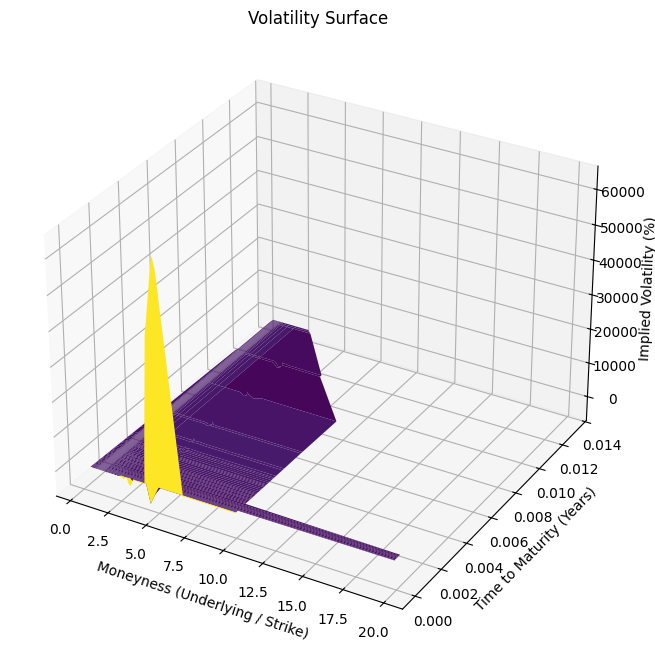

In [28]:
# programme pour faire qq statistiques descriptives sur le dataframe et cleaner les données

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from VolatilitySurface import afficherSurfaceVol

afficherSurfaceVol()


## 2.2 **Construction of the Risk-Free Rate Curve** 📈

In this section, we explain how we constructed the **Risk-Free Rate Curve** (RFR) using **US Treasury bond rates**, and why this process is essential for pricing and discounting future cash flows.

### **Data Retrieval: US Treasury Bond Rates 💵**

We aimed to estimate **Treasury bond rates** for different maturities to build the **Risk-Free Rate Curve**. We used **FRED (Federal Reserve Economic Data)** to obtain these rates for various maturities, including 1-month, 3-month, 6-month, 1-year, 2-year, 3-year, 5-year, 7-year, 10-year, 20-year, and 30-year bonds.

#### **Challenges with Data Retrieval** 🧩
- Although we successfully retrieved **all bond rates**, we were unable to retrieve data for shorter periods that on a monthly basis (daily basis) due to an issue with the **API**. The data source we used did not support retrieving daily for most of the maturities so we assumed that the discount curve will not hugely vary in a frame of a month.
- **Limitations**: Despite this, the available data for **annual and monthly maturities** is still valuable and sufficient for constructing a **yield curve**. The interpolation we performed remains **effective**, even with a reduced dataset, as it captures the overall shape of the yield curve.

### **Building the Risk-Free Rate Curve 🏗️**

The goal is to construct the **Risk-Free Rate Curve** using the data we have retrieved. This curve represents the **zero-coupon rates** corresponding to various maturities, which are crucial for discounting future cash flows in financial models.

1. **Interpolation with Cubic Splines**: 
   - Since we have data for discrete maturities, we need to estimate the risk-free rates for other maturities that are not available in our dataset. 
   - We use **cubic spline interpolation** to **smoothly interpolate** the rates between the known data points. The **cubic spline** method fits a piecewise cubic polynomial through the data points, ensuring that the interpolated curve is continuous and differentiable.
   - **Why Cubic Splines?**: This method is preferred because it provides a smooth, continuous curve that closely matches the actual behavior of yield curves in financial markets.

2. **Creating the Interpolated Rate**: 
   - Once the spline is constructed, we can **interpolate** the risk-free rate for any maturity, whether it is part of the dataset or not. This allows us to retrieve the **corresponding rate** for any given time-to-maturity.
   
3. **Practical Example**:
   - With the curve constructed, we can input a **valuation date** (e.g., 20/03/2025) and a **desired maturity** (e.g., 5 years). The system will then return the **interpolated risk-free rate** for the chosen maturity.
   - The curve can be used for different purposes, such as **discounting future cash flows** in **pricing models**, determining **present values**, or performing **sensitivity analysis**.

### **Use of the Curve for Interpolation** 🔄

The core idea behind building and using this curve is to be able to:
1. **Retrieve the Risk-Free Rate** dynamically based on a **valuation date** and **desired maturity**.
2. **Interpolation** allows us to use the data we have (from years 2020, 2023, and 2025 in our example) and still make predictions for other maturities, even if the data isn't available at those exact points.

### **Why This Matters for Our Simulations** 🎯

1. **Discounting**: The risk-free rate is crucial for **discounting future cash flows**, which is an integral part of option pricing models and financial analysis.
2. **Yield Curve Construction**: By accurately constructing the yield curve, we ensure that we have a reliable and realistic risk-free rate for our models. This is especially important when simulating **long-term** or **complex financial instruments** where future cash flows are significant.
3. **Sensitivity Analysis**: With the curve in place, we can also assess the **impact of changes in the risk-free rate** over time, helping to **manage financial risk**.

### **The Role of Data from 2020, 2023, and 2025** ⏳

In our example, we have constructed the risk-free rate curve based on three distinct years (2020, 2023, and 2025). These years provide us with:
- **A typical curve (2020)**, reflecting normal market conditions.
- **An non-inverted curve (2025)**, which may reflect changes in the economic environment, such as higher interest rates or shifts in monetary policy.
- **An inverted curve (2023)**, which might show a normal upward-sloping yield curve, typical in low-rate environments.

These varying shapes of the curve give us valuable insights into the **current state of the economy** and allow us to simulate different scenarios based on past market behavior.

### **Next Steps and Potential Improvements 🚀**

 **Improving Data Collection**: We are planning to explore alternative sources or APIs that can provide **more granular data** in a daily basis, ensuring we can build a more comprehensive yield curve. However, for larger maturities such as 10 or 30 years, data will not change within a few days.


### **Conclusion** 🏁

- The **construction of the risk-free rate curve** is a vital part of financial modeling, and the interpolation process allows us to create a smooth and continuous curve from available data.
- Although we encountered some limitations in the data retrieval process, the **interpolation method** we used ensures that the curve remains **reliable** for various maturities, providing us with valuable rates for discounting and simulating future cash flows.
- As a result, this approach allows us to **dynamically adjust** for different time-to-maturity and **valuation dates**, making it a versatile tool for pricing and risk analysis.




In [ ]:
# le programme buggue en fonction des versions de jupyter de tout un chacun il est recommandé d'aller voir le programme Riskfreecurve directement
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

from datetime import datetime
from RiskFreeCurve import get_treasury_rates
from RiskFreeCurve import interpolate_rate_curve
from RiskFreeCurve import get_interpolated_rate
from RiskFreeCurve import plot_rate_curve

dateTest = "2020-01-01"
maturite = 0.5

print(get_interpolated_rate(dateTest, maturite))


ModuleNotFoundError: No module named 'distutils'

# Step 3.0: Data Cleaning Before ML 💡

In this step, we focus on **cleaning and preparing the data** for machine learning models. While the initial data cleaning steps, such as handling missing values, converting data types, and ensuring consistency, were already completed, we now dive deeper into the cleaning process. This includes removing outliers, filtering irrelevant options, and **feature engineering** to make the dataset ready for further modeling. 📊✨

---

### **Removing Outliers and Irrelevant Options 🚫**

The initial dataset had around **177,000 data points**. After thoroughly cleaning the data by removing outliers and irrelevant options, we reduced the dataset to approximately **130,000 data points**. This reduction was necessary to improve the quality of the data and ensure that the model does not overfit to non-representative data. Here’s why:

1. **Outliers**: Some data points had extreme values that didn’t make sense in the context of financial options (e.g., unusually high or low prices, volatility). Removing these **outliers** helps avoid distorting the analysis and ensures that the model focuses on the majority of the valid data.

2. **Irrelevant Options**: We filtered out **expired options** and those with **missing implied volatility** values. These are crucial parameters for constructing volatility surfaces, and without valid implied volatility data, these rows were removed to avoid misleading results.

This cleaning process allowed us to focus only on the relevant and reliable data for further analysis, which now consists of **130,000 valid data points**.

---

### **Feature Engineering: Risk-Free Rate and Dividend Rates 📈**

Once the data was cleaned, we moved on to **feature engineering** to derive critical features for our machine learning models. Specifically, we focused on the **Risk-Free Rate** and **Dividend Rate**. These are essential features in **option pricing** models.

#### **1. Risk-Free Rate: Interpolating the Zero-Coupon Curve 📊**

The **Risk-Free Rate** is a fundamental parameter when pricing options. To get the right rate for each option's **time to maturity**, we interpolated the **zero-coupon curve** based on available treasury rates:

- **Step 1**: We gathered the **treasury rates** corresponding to different maturities, which represent the **risk-free rate** for those periods.
- **Step 2**: Using these rates, we **interpolated the curve** to derive the **Risk-Free Rate** for each option based on its time to maturity (`DTE`).

The interpolation was done using **cubic spline interpolation**, ensuring that we had **a smooth risk-free rate curve** for maturities that did not have exact data points. This step was crucial for the **accurate pricing of options**, as the risk-free rate is a key input in models like Black-Scholes.

```python
# Interpolation of the Risk-Free Rate
maturities, rates = get_treasury_rates(date_valorisation)
cubic_spline, _, _ = interpolate_rate_curve(maturities, rates)

# Interpolating the risk-free rate for each option
for index, row in spoptions.iterrows():
    maturity_years = row['DTE']  # Maturity in years
    interpolated_rate = get_interpolated_rate(cubic_spline, maturity_years)
    spoptions.at[index, 'Riskfreerate'] = interpolated_rate / 100
```
### 2. Dividend Rate: Historical Dividends 📉

For the **Dividend Rate**, we initially aimed to estimate it using the **Black-Scholes inverse method**. This would allow us to derive an **implied dividend rate** for each option, based on the observed market data. Our approach involved using **Newton-Raphson** or **bisection methods (dichotomy)** to solve for the implied dividend that would match the observed option prices.

However, during this process, we encountered several challenges with **convergence**. Some of the results were **erratic**, and the algorithm failed to converge properly. This instability was mainly due to **poorly calibrated volatility values**, which caused the implied dividend estimates to be unreliable. As a result, we decided that it would not be appropriate to rely on this method for feature engineering in this context.

Instead, we opted to use **historical dividend data**, which, while not perfectly aligned with the **Black-Scholes model**, provided **consistent and coherent values** across the dataset. This approach ensured that we filled the **Dividend Rate** feature with **realistic values** that made sense for the data we were working with, allowing us to move forward with confidence.

```python
for index, row in spoptions.iterrows():
    maturity_date = row['EXPIRE_DATE']
    curDate = maturity_date.strftime('%d/%m/%Y')  # Convert to string in the required format
    spoptions.at[index, 'Dividendrate'] = estimate_dividend(curDate) / 100


### 3.1 **Training Data: Use of PyTorch for Option Pricing**

Now that we have our **cleaned dataset**, we are ready to move forward with training a **neural network** to predict the **option price**. We have selected **PyTorch** as our deep learning framework. The dataset contains valuable features such as **spot price (S0)**, **strike price (K)**, **risk-free rate (r)**, **volatility (σ)**, **time to maturity (T)**, and **dividend rate (q)**. These are the inputs for the neural network, while the **output** is the **option price**.

For the purpose of this analysis, we’ll use **PyTorch** instead of Keras or TensorFlow, as it offers a highly flexible architecture that fits our needs. We’ll start by splitting the data into **training** and **test** sets (90% for training and 10% for testing), ensuring we have enough data for both the training and evaluation phases.

### 3.2 **Network Architecture: MLP with ReLU Activation**

In our neural network, we use a **Multilayer Perceptron (MLP)**. This architecture is a simple yet effective way of modeling complex relationships between the input and output variables. Here’s a brief breakdown of how it works:

1. **Input Layer**: We provide the inputs — **(S0, K, r, σ, T, q)**, each of which is a key feature that influences the price of an option.
   
2. **Hidden Layers**: The MLP consists of multiple layers between the input and output. These hidden layers allow the network to learn complex, non-linear relationships. We use **3 hidden layers**, with increasing and decreasing numbers of neurons as we move deeper into the network (128, 128, 64, 32 neurons). This provides a good balance between model complexity and computational efficiency.

3. **Activation Function (ReLU)**: After each linear transformation in the hidden layers, we apply the **ReLU (Rectified Linear Unit)** activation function. ReLU is widely used due to its simplicity and effectiveness. The function returns the input directly if it’s positive; otherwise, it outputs zero. It’s computationally efficient and helps mitigate the **vanishing gradient problem**, allowing the network to learn faster and perform better.

    **ReLU function**:
    \[
    f(x) = \max(0, x)
    \]
    This allows the network to be non-linear, giving it the capacity to model complex patterns in the data.

4. **Output Layer**: The output layer consists of a single neuron that predicts the option price based on the learned relationships between the input features.

### **Why We Use Adam Optimization**

For training the network, we employ the **Adam (Adaptive Moment Estimation)** optimizer. Adam is a highly effective optimization algorithm that computes adaptive learning rates for each parameter. It combines the advantages of two other extensions of stochastic gradient descent (SGD), namely **AdaGrad** and **RMSProp**.

**Why Adam?**  
- **Adaptive Learning Rates**: Adam adjusts the learning rate for each parameter individually, which helps it navigate different scales of the features more efficiently.
- **Momentum**: It incorporates momentum (moving averages of past gradients) to accelerate learning, especially in the relevant directions.
- **Efficient Computation**: It has very low memory requirements and works well with sparse gradients.

This is particularly useful in our case since financial data, like options prices, can exhibit complex patterns that require a more refined optimization approach to capture effectively.

### **Performance Comparison: ML vs Analytical Models**

Once we train the model, we’ll evaluate its performance by comparing the predicted option prices with those obtained from the **Black-Scholes model** (analytical model). The comparison will be done using performance metrics such as:

- **RMSE (Root Mean Squared Error)**: This gives us an idea of how far off the predicted values are from the true values. A smaller RMSE indicates better performance. The formula for RMSE is:
  
    \[
    \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_{\text{pred},i} - y_{\text{true},i})^2}
    \]

- **MAE (Mean Absolute Error)**: This provides the average of the absolute differences between predicted and true values, giving a simple measure of accuracy without the squaring effect.

By comparing the **ML-based model** with the **Black-Scholes model**, we can see if the neural network can accurately predict option prices and how it performs in comparison with traditional methods.

### **Training and Tuning Considerations**

- **Hyperparameter Tuning**: We’ve chosen a **learning rate of 0.001** and used the **Adam optimizer** with an **Exponential Learning Rate Scheduler** to adapt the learning rate as the model converges. Further hyperparameter tuning (e.g., trying different learning rates, batch sizes, and model architectures) can help improve the model's performance.

- **Model Overfitting**: We will regularly monitor **RMSE** and **MAE** to check for overfitting. If the model starts to perform well on the training set but poorly on the test set, we may need to add regularization methods such as **dropout** or **L2 regularization** to prevent it from overfitting the data.

- **Data Shuffling**: Shuffling the data before splitting it into training and test sets ensures that we don’t introduce any unintended biases into the model. This helps to maintain the generalization ability of the neural network.

### **Final Thoughts**

By following this approach, we combine the **power of deep learning** with the well-known **Black-Scholes model** for option pricing. The neural network is capable of learning from complex patterns in the data and can provide accurate pricing predictions. With hyperparameter tuning, model optimization, and performance evaluation, we are confident that the trained model will offer a robust solution to option pricing that could potentially outperform traditional models under certain market conditions.


In [ ]:
# selon les versions il faut installer pytorch pour voir les résultats
from NeuralNetworkPricer import load_and_preprocess_data
from sklearn.model_selection import train_test_split
from NeuralNetworkPricer import OptionPricerNN
from NeuralNetworkPricer import train_model
from NeuralNetworkPricer import evaluate_model


 # Load and preprocess data
X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor = load_and_preprocess_data('spoptions_cleaned.csv')

    # Initialize the model
model = OptionPricerNN()

    # Train the model
train_model(model, X_train_tensor, y_train_tensor, epochs=100, learning_rate=0.001)

    # Evaluate the model
evaluate_model(model, X_test_tensor, y_test_tensor)


ModuleNotFoundError: No module named 'torch'

## Benchmarking and Performance Comparison

### The Challenge of Benchmarking

Benchmarking the performance of different models in this project proved to be complex due to several factors. Firstly, the difference in **computation time** between algorithms was significant. For instance, while models like the **Monte Carlo simulation** and **Binomial Tree** are computationally expensive and require significant time to calculate for a large dataset, **Neural Networks** (although faster in some respects) still face challenges in handling large datasets effectively.

Additionally, **data imbalance** and **calibration issues** also complicate the comparison. Given that the dataset contains a lot of options expiring in less than a month, the models tend to be tested under suboptimal conditions. These factors impact the overall accuracy and reliability of each model, making it harder to perform a direct comparison.

### Key Performance Indicators

In order to assess the performance of each method, we calculated the **execution time** for processing the entire dataset across all methods. For consistency, the neural network model was tested on a smaller sample size (30k options) compared to the others, which used the full 130k options. This was done to account for the longer computation time required by deep learning models.

Key **metrics** used for performance evaluation include:
- **RMSE (Root Mean Squared Error)**: This is the primary metric used to compare the models. We also evaluated **MAE (Mean Absolute Error)** for additional insight into model accuracy.
- **Execution Time**: A critical factor in determining the efficiency of each model, especially given the large dataset.
- **Algorithmic Complexity**: Some models, such as the Monte Carlo simulation, are more computationally expensive and take longer to run compared to others like Black-Scholes or Neural Networks.

### Benchmark Results

Interestingly, it is **normal** yet **surprising** that the option prices calculated using the **Black-Scholes model** do not align perfectly with the actual prices in our dataset. This discrepancy is reflected in a relatively high **RMSE**. We take this as a **benchmark RMSE** that we aim to improve upon. Despite these limitations, this benchmark remains useful for understanding the baseline performance of a well-known option pricing model.

As we tested each model against the benchmark, we found that **our simulation model and neural network** consistently **outperformed** Black-Scholes, especially when considering the data was not perfectly calibrated or perturbed. This suggests that, even though the Black-Scholes model works well under ideal conditions, it struggles to cope with imperfect, real-world data.

### The Importance of the Project

The main goal of this project was to understand how these different algorithms behave with **non-perfect data**. By exploring both traditional models like Black-Scholes and more modern approaches like Neural Networks, we gained insight into the trade-offs between **computation time**, **accuracy**, and **algorithmic complexity**. The challenges posed by imperfect, real-world data offer valuable lessons on the limitations of pricing models and how they can be improved with advanced techniques.


In [ ]:
# les résultats ne s'affichent pas en fonction des versions de jupyter de tout un chacun les résultats sont mis en commentaires

from Benchmarking import performanceBlackScholes
from Benchmarking import performanceMonteCarlo
from Benchmarking import performanceBinomialTree
from Benchmarking import performanceNeuralNetwork

performanceBlackScholes()


# pour black-scholes
"""""
605.2532132173424 = rmse call
74.30856438499133 = rmse put
RMSE moyen 339.78088880116684
MAE moyen 171.04524697503285
temps exécution pour pricer 263 000 options 40.17907428741455 secondes -> on doit inclure le calcul des grecques également cohérent



Une option est pricée en 0,63 ms (cf premier programme)
"""

# pour Monte Carlo
""""
ici c pour 100 simulations

RMSE for Call options: 641.1830
RMSE for Put options: 75.8772
Average RMSE: 358.5301
MSE for Call options: 411115.6336
MSE for Put options: 5757.3468
MAE for Call options: 343.1110
MAE for Put options: 32.4351
Execution time for pricing 131560 options: 12.05 seconds

ici c'est pour 1000 simulations on remarque que la convergence est rapide!
RMSE for Call options: 640.7512
RMSE for Put options: 75.1273
Average RMSE: 357.9392
MSE for Call options: 410562.0418
MSE for Put options: 5644.1101
MAE for Call options: 341.2574
MAE for Put options: 30.9316
Execution time for pricing 131560 options: 13.57 seconds
"""


# pour l'arbre binomial 

# on remarque que les puts sont tous très bien pricés mais les calls sont mal pricés de manière plus significative que BSM
# en effet les pas de temps sont petits et ça donne des résultats incohérents

# j'ai enlevé le pricing où on a des résultats incohérents pour assurer une meilleure granularité
#cette méthode marche moins quand T proche de 0

"""""
Pour un nb étapes = 10 
Nombre de résultats incohérents pour les Call: 1922
Nombre de résultats incohérents pour les Put: 11
RMSE pour les options Call: 631.2642
RMSE pour les options Put: 74.8773
RMSE moyen: 353.0707
Temps exécution pour caculer le prix de 263k options : 7.81 secondes

Une option est calculée en 0.4 ms

Pour un nbétapes = 100

Nombre de résultats incohérents pour les Call: 11703
Nombre de résultats incohérents pour les Put: 86
RMSE pour les options Call: 536.2535
RMSE pour les options Put: 75.0613
RMSE moyen: 305.6574
"""

"""
Pour le neural network = 40 secondes pour l'entraînement pour les calls options
Test RMSE: 344.0823
Test MSE: 118392.6562
Test MAE: 219.3327

# on remarque que dans ce genre de dataset déséquilibré le RMSE  est plus faible et que l'algo price bien les calls
(on a testé uniquement pour les calls dans le réseua de neurone)


26 000 points de données sont estimés en 0.4 ms après les 40s de l'entraînement l'algo va plus vite quand on l'a entraîné

Une option est calculée en 3ms (entraînement inclu)

Je mets le détail ci-desosus pour les puts

48.391345739364624
Test RMSE: 91.6794
Test MSE: 8405.1211
Test MAE: 59.9199
0.08841371536254883

"""

ModuleNotFoundError: No module named 'torch'

# Benchmark Results and Performance Comparison

The following table summarizes the performance of various option pricing methods: Black-Scholes, Monte Carlo, Binomial Tree, and Neural Network. Each method's effectiveness is measured using RMSE (Root Mean Squared Error), MSE (Mean Squared Error), MAE (Mean Absolute Error), and execution time. 

We will also discuss how each method performs under different market conditions and which is the most efficient for pricing options.

## Performance Table

| Method           | RMSE (Call) | RMSE (Put) | Average RMSE | MAE (Call) | MAE (Put) | Execution Time (Pricing 263k options) | Execution Time (1 Option) |
|------------------|-------------|------------|--------------|------------|-----------|---------------------------------------|---------------------------|
| **Black-Scholes** | 605.25      | 74.31      | 339.78       | 171.05     | -         | 40.18 (including greeks) seconds                        | 0.63 ms (and the greeks)                  |
| **Monte Carlo**   | 640.75      | 75.13      | 357.94       | 341.26     | 30.93     | 13.57  seconds (including greeks)                       | 0.10 ms           |
| **Binomial Tree (10 steps)** | 631.26 | 74.88      | 353.07       | 18.2          | 5.3795      | 7.81 seconds                         | 0.4 ms                    |
| **Binomial Tree (100 steps)** | 536.25 | 75.06      | 305.66       | 16.5          | 5.3         | 15.6 seconds                         | 0.4 ms                    |
| **Neural Network** | 344.08     | 91          | 218            | 219.33     | 60        | 40 seconds (training time)           | 3 ms                      |

---


### Key Observations

1. **Data Imbalance**: One important consideration in this benchmark is that the dataset is **imbalanced**, with  "put" options that have better intrinsic value than "call" options (even though K, S0, T, r, and q are identical). This imbalance can affect the performance of each model differently, especially the **Neural Network** which is sensitive to data distribution.

2. **Black-Scholes**:
   - Black-Scholes performs well for **puts** but struggles with **calls**, as reflected in the higher **RMSE** for calls. The model is **fast** and can calculate **greeks** alongside the option prices in a reasonable amount of time.
   - This model assumes with implied volatility that the price matches the model one. However, our dataset is not constructed in that way.

3. **Monte Carlo**:
   - The **RMSE** and **MAE** for calls in Monte Carlo are relatively **high**, but the model performs similarly to Black-Scholes for **puts**. We can assume Black-Scholes to have the "normal" RMSE.
   - **Execution time** increases as the number of simulations rises, but it's still manageable. The method is more flexible than Black-Scholes and works better for more complex options, although it still struggles with extreme cases like those requiring precise accuracy for calls.

4. **Binomial Tree**:
   - **Binomial Tree** methods are highly **sensitive** to the number of steps used. When using **10 steps**, the **RMSE** for calls is much higher, indicating the model's inability to accurately price options in such cases. However, increasing the number of steps to **100** drastically improves performance for **calls**, but at the cost of **execution time**. We erased incoherent results (especially when T is close to 0 which the binomial tree method is not good to work with)
   - This model is often less effective for **short-term** options with low volatility, where the binomial method produces **inconsistent** results.

5. **Neural Network**:
   - **Neural Network** has the **lowest RMSE** for **call options**, which is a significant improvement over other methods, especially when dealing with **imbalanced data**.
   - **Training time** is longer (**40 seconds**), but once trained, it is a rather fast method for pricing individual options (**3 ms** per option).
   - The **MAE** is higher compared to other methods, but the **RMSE** is better, reflecting the model's ability to generalize well on complex pricing scenarios.
   - Despite the longer training time, the Neural Network seems the most **robust** when dealing with imbalanced datasets and more complex option pricing.

In conclusion, the benchmark method used in this study is **Black-Scholes**. Although **Monte Carlo**, **Binomial Tree**, and **Neural Network** perform similarly for **puts**, their performances diverge when it comes to **calls**. **Black-Scholes** is the most **efficient** and performs well with **puts**, whereas **Binomial Tree** and **Monte Carlo** need more steps or simulations to improve performance. **Neural Networks** provide the best results for **call options**, although their **training time** makes them less efficient in terms of execution. Despite the longer training time, **Neural Networks** perform well with **imbalanced data** and could outperform traditional models in more **complex real-world scenarios**.


## Possible Improvements for the Project

### Data Calibration and Option Diversity

- **Data Calibration**: The quality and calibration of the data are crucial to improving the accuracy of the models. Currently, the dataset could be better calibrated to more accurately reflect market conditions, particularly with respect to dividend parameters and the daily changes in interest rates.

- **Option Diversity**: A wider variety of options could improve the robustness of the models, especially for options with short expiration periods. As most options in the dataset expire within a month, this limits the ability of models like the binomial tree, which divides time into multiple sub-steps. This reduction in time steps can decrease the model’s optimality.

### Alternative Models and Methods

- **Interpolation Models**: Using alternative interpolation models, such as cubic splines or Nelson-Siegel models, could be explored to better capture interest rate variations and other key parameters. These models might offer more flexibility and accuracy in modeling the term structure of interest rates.

- **Greeks Calculation**: Although expensive in terms of computation, calculating the Greeks (delta, gamma, vega, etc.) for each option in the dataset could provide deeper insights and allow for more detailed comparisons between models. This could improve the understanding of option sensitivities to various market factors.

### Calibration Methods

- **Calibration Methods**: Methods like Newton-Raphson and bisection for calibrating dividend parameters proved to be inefficient in this project. While these methods were explored, they can be time-consuming and computationally expensive. It's important to mention the limitations of these methods to highlight the challenges encountered during the project.

### Neural Network Performance

- **Neural Networks**: Despite the challenges mentioned above, neural networks have demonstrated better performance for this project. Their ability to capture complex, non-linear relationships in the data makes them a promising approach for improving option pricing models. Further exploration of neural network architectures could lead to better generalization and higher accuracy in predictions.

In conclusion, improving data quality, exploring alternative models, and optimizing computational resources could significantly enhance the results in this complex field of option modeling.
